# Goals 

_How does smoking affect the insurance costs?_   
_How does having children affect the insurance costs?_   
_How does getting older affect the insurance costs?_ 

### Packages

In [80]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import datasets
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import ipywidgets
from scipy import stats
from ydata_profiling import ProfileReport
%matplotlib inline

### Path

In [81]:
df= pd.read_csv("/Users/unclenamo/Desktop/CodingCareer/python-portfolio-example-solution/insurance.csv")

## Descriptive Analysis

In [82]:
bmi = df['bmi']
print(bmi)


0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64


In [83]:
Smoker = df['smoker']
print(Smoker)

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object


In [84]:
Age = df['age']
print(Age)

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [86]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [87]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Visualizations

Text(0.5, 1.0, 'Insurance Cost Distribution for Smokers and Non-Smokers')

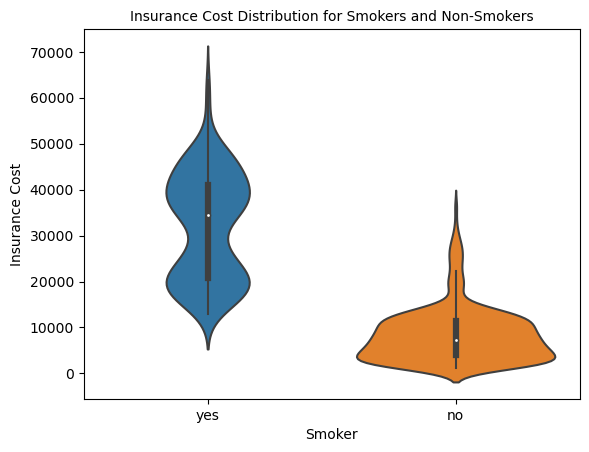

In [89]:
sns.violinplot(x='smoker', y='charges', data=df)
plt.xlabel('Smoker')
plt.ylabel('Insurance Cost')
plt.title('Insurance Cost Distribution for Smokers and Non-Smokers', fontsize = 10)

Text(0.5, 1.0, 'Insurance Cost Distribution for Male and Females')

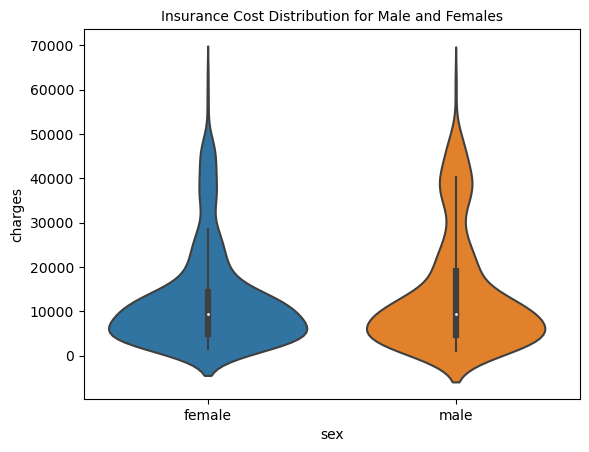

In [90]:
sns.violinplot(x='sex', y='charges', data=df)
plt.title('Insurance Cost Distribution for Male and Females', fontsize = 10)

In [91]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [92]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Age vs Charges')

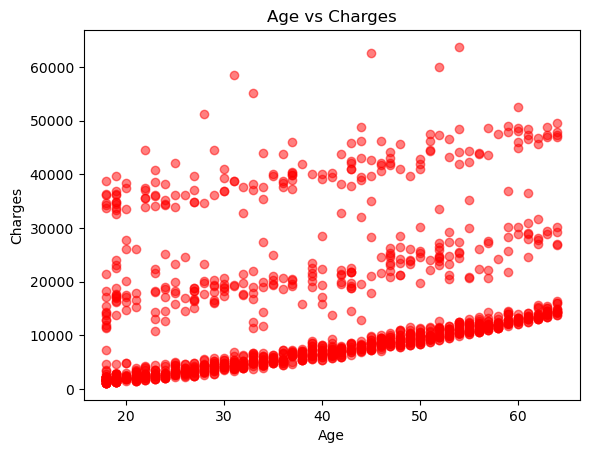

In [93]:
plt.scatter(x = df['age'], y = df['charges'], alpha = 0.5, color = 'red')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')


<AxesSubplot:xlabel='age', ylabel='charges'>

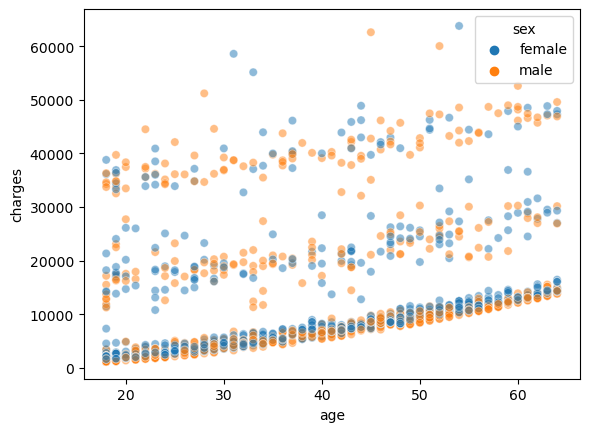

In [94]:
sns.scatterplot(x = 'age' , y = 'charges', data = df, hue = 'sex', alpha =0.5)

# PreProcessing

In [128]:
labelencoder = LabelEncoder()

In [129]:
selected_columns = ['age','children','smoker','charges']

In [130]:
df['smoker'] = df['smoker'].replace("yes",1)

In [131]:
df['smoker'] = df['smoker'].replace("no", 0)

In [132]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [133]:
df_new = df[selected_columns]

In [141]:
# Calculate the Z-scores for each column in the DataFrame
z_scores = np.abs(stats.zscore(df_new))

# Set a threshold and filter outliers
threshold = 2
filtered_df = df_new[(z_scores < threshold).all(axis=1)]

In [142]:
# Display the results
print("Original DataFrame:")
print(df_new)

print("\nFiltered DataFrame:")
print(filtered_df)

Original DataFrame:
      age  children  smoker      charges
0      19         0       1  16884.92400
1      18         1       0   1725.55230
2      28         3       0   4449.46200
3      33         0       0  21984.47061
4      32         0       0   3866.85520
...   ...       ...     ...          ...
1333   50         3       0  10600.54830
1334   18         0       0   2205.98080
1335   18         0       0   1629.83350
1336   21         0       0   2007.94500
1337   61         0       1  29141.36030

[1338 rows x 4 columns]

Filtered DataFrame:
      age  children  smoker      charges
0      19         0       1  16884.92400
1      18         1       0   1725.55230
2      28         3       0   4449.46200
3      33         0       0  21984.47061
4      32         0       0   3866.85520
...   ...       ...     ...          ...
1333   50         3       0  10600.54830
1334   18         0       0   2205.98080
1335   18         0       0   1629.83350
1336   21         0       0   20

# Prediction Analysis 

In [143]:
df_new

,age,children,smoker,charges
0,19,0,1,16884.92400
1,18,1,0,1725.55230
2,28,3,0,4449.46200
3,33,0,0,21984.47061
4,32,0,0,3866.85520
...,...,...,...,...
1333,50,3,0,10600.54830
1334,18,0,0,2205.98080
1335,18,0,0,1629.83350
1336,21,0,0,2007.94500


### Regression

In [148]:
X = df_new[['age','children','smoker']]
y = df_new['charges']

In [149]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [152]:
# Make predictions on the test set
y_pred = reg_model.predict(X_test)

In [153]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

MSE: 37581372.27
RMSE: 6130.36
R-squared: 0.76


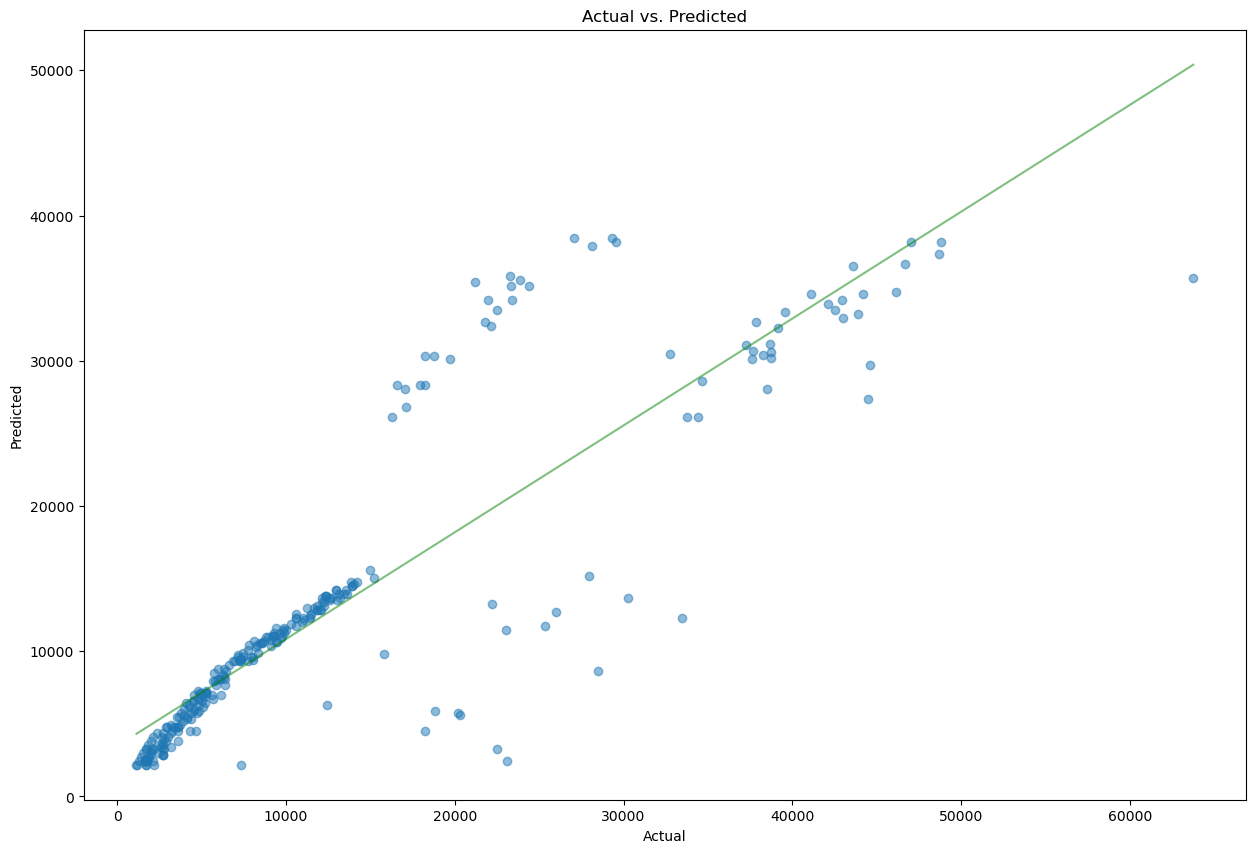

In [155]:
plt.figure(figsize =(15,10))
plt.scatter(y_test,y_pred, alpha = 0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual vs. Predicted")

#Line of Best Fit
coefficients = np.polyfit(y_test, y_pred, 1)  # Fit a first-degree polynomial (line)
slope = coefficients[0]
intercept = coefficients[1]
x_line = np.linspace(min(y_test), max(y_test), 100)  # Generate 100 equally spaced x-values
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='green', label='Line of Best Fit', alpha = 0.5)  # Line of best fit

plt.show()

# Conclusion  

Having  _number of children, sex, smoker status, and age_   as the main input paramters
are not sufficient enough in predicting the cost of the insurance accurately.   
